Benedrix, a machine tool company is interested in understanding the impact of machine hours and production run, on its overhead cost.

Fit the regression equation for the following:<br>
- Overhead = F (machine hours)
- Overhead = F (production runs)
- Overhead = F (machine hours, production runs)

1) Is production run strongly correlated with machine hours?<br>
2) Find the R-Squared in all 3 cases?<br>
3) How would you explain the additional lift in R-Squared of the combined model vs each of the individual model?

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

import statsmodels.api as sm

In [2]:
# load the data
df = pd.read_csv("C:/Users/Karthik.Iyer/Downloads/AccelerateAI/Regression-Models-main/MLR_Q09_FactoryOverhead.csv")
df.head()

,Month,Machine Hours,Production Runs,Overhead Cost
0,1,1539,31,99798
1,2,1284,29,87804
2,3,1490,27,93681
3,4,1355,22,82262
4,5,1500,35,106968


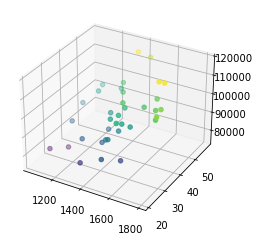

In [3]:
# Let's visualize the data in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')

x1 = df['Machine Hours']
x2 = df['Production Runs']
y = df['Overhead Cost']

ax.scatter3D(x1, x2, y, c=y)

We can observe that the absolute values for x1 and x2 are on different scale. x1 is larger than x2.

### 1) Is production run strongly correlated with machine hours?

In [4]:
df.corr()

,Month,Machine Hours,Production Runs,Overhead Cost
Month,1.000000,0.037230,0.192256,0.143891
Machine Hours,0.037230,1.000000,-0.229093,0.631885
Production Runs,0.192256,-0.229093,1.000000,0.520544
Overhead Cost,0.143891,0.631885,0.520544,1.000000


No. As we can see in the above table. Production Runs is not strongly correlated with Machine Hours.

### 2) Find the R-Squared in all 3 cases?

**Case 1: Fit the regression equation for:**
- Overhead = F (machine hours)

In [5]:
# Let's train the model
Y = df['Overhead Cost']
X = df['Machine Hours']

X = sm.add_constant(X)
reg_model1 = sm.OLS(Y,X).fit()
reg_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Overhead Cost   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     22.60
Date:                Fri, 13 May 2022   Prob (F-statistic):           3.57e-05
Time:                        08:06:30   Log-Likelihood:                -376.13
No. Observations:                  36   AIC:                             756.3
Df Residuals:                      34   BIC:                             759.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.862e+04   1.07e+04      4.533      0.000    2.68e+04    7.04e+04
Machine Hours    34.7022      7.300      4.754      0.000      19.867      49.537
==============================================================================
Omnibus:                        0.251   Durbin-Watson:                   2.451
Prob(Omnibus):                  0.882   Jarque-Bera (JB):                0.140
Skew:                           0.141   Prob(JB):                        0.933
Kurtosis:                       2.886   Cond. No.                     1.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-Squared for case 1 is 0.399. Only about 39.9% variation in OVerhead Cost is explained by variation in Machine Hours**

**Case 2: Fit the regression equation for:**
- Overhead = F (production runs)

In [6]:
# Let's train the model
Y = df['Overhead Cost']
X = df['Production Runs']

X = sm.add_constant(X)
reg_model2 = sm.OLS(Y,X).fit()
reg_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Overhead Cost   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     12.64
Date:                Fri, 13 May 2022   Prob (F-statistic):            0.00114
Time:                        08:06:30   Log-Likelihood:                -379.62
No. Observations:                  36   AIC:                             763.2
Df Residuals:                      34   BIC:                             766.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7.561e+04   6808.611     11.104      0.000    6.18e+04    8.94e+04
Production Runs   655.0707    184.275      3.555      0.001     280.579    1029.562
==============================================================================
Omnibus:                        0.597   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.742   Jarque-Bera (JB):                0.683
Skew:                          -0.264   Prob(JB):                        0.711
Kurtosis:                       2.580   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Squared for case 2 is 0.271. Only about 27.1% of variation in Overhead Cost is explained by variation in Production Runs

**Case 3: Fit the regression equation for:**
- Overhead = F (machine hours, production runs)

In [7]:
# Let's train the model
Y = df['Overhead Cost']
X = df[['Machine Hours','Production Runs']]

X = sm.add_constant(X)
reg_model3 = sm.OLS(Y,X).fit()
reg_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Overhead Cost   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     107.0
Date:                Fri, 13 May 2022   Prob (F-statistic):           3.75e-15
Time:                        08:06:30   Log-Likelihood:                -349.07
No. Observations:                  36   AIC:                             704.1
Df Residuals:                      33   BIC:                             708.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3996.6782   6603.651      0.605      0.549   -9438.551    1.74e+04
Machine Hours      43.5364      3.589     12.129      0.000      36.234      50.839
Production Runs   883.6179     82.251     10.743      0.000     716.276    1050.960
==============================================================================
Omnibus:                        3.142   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                2.259
Skew:                          -0.609   Prob(JB):                        0.323
Kurtosis:                       3.155   Cond. No.                     1.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-Squared for case 3 is 0.866. This indicates that 86.6% of variation of Overhead Cost is explained by variation in both Machine Hours and Production Runs combined.**

### 3) How would you explain the additional lift in R-Squared of the combined model vs each of the individual model?

In [8]:
df.corr()

,Month,Machine Hours,Production Runs,Overhead Cost
Month,1.000000,0.037230,0.192256,0.143891
Machine Hours,0.037230,1.000000,-0.229093,0.631885
Production Runs,0.192256,-0.229093,1.000000,0.520544
Overhead Cost,0.143891,0.631885,0.520544,1.000000


As we can observe, there is a correlation of each of the variables with Overhead Cost (0.63, 0.52), but they do not seem to have significant correlation among themselves (-0.22, -0.22). Due to this, when we analyze the model together, the R-Squared improves.